In [1]:
# imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# With original features

In [2]:
# read data
df_incidents = pd.read_csv('../datasets_clean/incidents_clean.csv', index_col=0)

In [3]:
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2015.0
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017.0
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,26.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,Shot - Wounded/Injured,2016.0
5,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,65.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2014.0
6,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,26.0,0.0,0.0,5.0,5.0,0.0,2,1,2.0,0.0,5.0,Shot - Wounded/Injured,2018.0


In [4]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174421 entries, 0 to 239311
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       174421 non-null  object 
 1   state                      174421 non-null  object 
 2   city_or_county             174421 non-null  object 
 3   address                    162143 non-null  object 
 4   latitude                   174421 non-null  float64
 5   longitude                  174421 non-null  float64
 6   congressional_district     164507 non-null  float64
 7   avg_age_participants       174421 non-null  float64
 8   n_participants_child       174421 non-null  float64
 9   n_participants_teen        174421 non-null  float64
 10  n_participants_adult       174421 non-null  float64
 11  n_males                    174421 non-null  float64
 12  n_females                  174421 non-null  float64
 13  n_killed                   174421 

In [5]:
df_incidents['isKilled'] = df_incidents['n_killed'] > 0

<Axes: title={'center': 'Percentage of incidents with killed people'}, ylabel='count'>

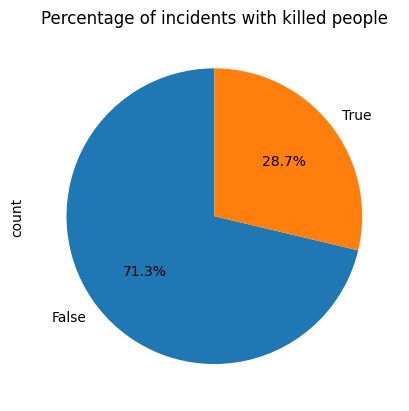

In [6]:
#pie chart
df_incidents['isKilled'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title = 'Percentage of incidents with killed people')

## Extracting features

In [7]:
cols2drop =['date', 'year', 'state', 'city_or_county', 'n_killed', 'incident_characteristics1', 'congressional_district', 'address']
df_incidents = df_incidents.drop(cols2drop, axis=1)

In [8]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174421 entries, 0 to 239311
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              174421 non-null  float64
 1   longitude             174421 non-null  float64
 2   avg_age_participants  174421 non-null  float64
 3   n_participants_child  174421 non-null  float64
 4   n_participants_teen   174421 non-null  float64
 5   n_participants_adult  174421 non-null  float64
 6   n_males               174421 non-null  float64
 7   n_females             174421 non-null  float64
 8   n_injured             174421 non-null  int64  
 9   n_arrested            174421 non-null  float64
 10  n_unharmed            174421 non-null  float64
 11  n_participants        174421 non-null  float64
 12  isKilled              174421 non-null  bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 17.5 MB


## K-nearest neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

We split the data first into development and test set, then we split again the development set into training and validation set. We use the training set to train the model and the validation set to evaluate the model. We use the test set to evaluate the model on unseen data.
We used a ratio of 70% development set and 30% test set.
Then we used a ratio of 75% training set and 25% validation set.

In [10]:
# split data
X = df_incidents.drop('isKilled', axis=1)
y = df_incidents['isKilled']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)
print(' # X_train: ', X_train.shape[0])
print(' # X_val : ', X_val.shape[0])
print(' # X_test : ', X_test.shape[0])
print("% killed in train set: ", y_train.sum()/y_train.shape[0])
print("% killed in val set: ", y_val.sum()/y_val.shape[0])
print("% killed in test set: ", y_test.sum()/y_test.shape[0])


 # X_train:  111192
 # X_val :  37065
 # X_test :  26164
% killed in train set:  0.28671127419238795
% killed in val set:  0.28700930797248075
% killed in test set:  0.28898486469958723


In [11]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


NameError: name 'X_train' is not defined

In [12]:
X_train_balanced = np.concatenate((X_train[y_train==1], X_train[y_train==0][:X_train[y_train==1].shape[0]]))
y_train_balanced = np.concatenate((y_train[y_train==1], y_train[y_train==0][:y_train[y_train==1].shape[0]]))
print(' # X_train_balanced: ', X_train_balanced.shape[0])
print(' # y_train_balanced: ', y_train_balanced.shape[0])
print("% killed in train set: ", y_train_balanced.sum()/y_train_balanced.shape[0])

 # X_train_balanced:  63760
 # y_train_balanced:  63760
% killed in train set:  0.5


In [13]:
# train model
accuracy_scores = []
for i in tqdm(range(1, 10)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy_scores.append(accuracy_score(y_val, y_pred))

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [21:38<00:00, 144.23s/it]


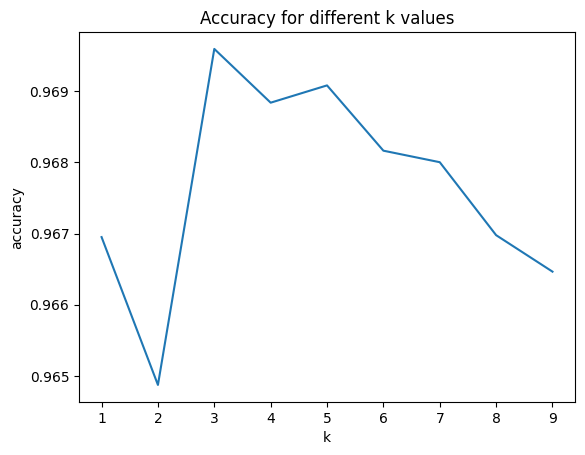

In [14]:
plt.plot(range(1, 10), accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy for different k values')
plt.show()

In [15]:
# train again with best k on whole dev set
X_dev = scaler.fit_transform(X_dev)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_dev, y_dev)
print('ended fit')
y_pred = knn.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

KeyboardInterrupt: 

## Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression


In [17]:
# train model
logreg = LogisticRegression('none')
logreg_model = logreg.fit(X_train_balanced, y_train_balanced)
y_pred = logreg.predict(X_val)
y_pred_train = logreg.predict(X_train_balanced)
print('Accuracy on training set: ', accuracy_score(y_train_balanced, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train_balanced, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_val, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val, y_pred))
print('Classification report: \n', classification_report(y_val, y_pred))

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy on training set:  0.9805207026348808
confusion_matrix on training set: 
 [[31082   798]
 [  444 31436]]
Accuracy on validation set:  0.9774180493727236
Confusion matrix: 
 [[25756   671]
 [  166 10472]]
Classification report: 
               precision    recall  f1-score   support

       False       0.99      0.97      0.98     26427
        True       0.94      0.98      0.96     10638

    accuracy                           0.98     37065
   macro avg       0.97      0.98      0.97     37065
weighted avg       0.98      0.98      0.98     37065



In [18]:
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_model, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (d:\Python\Lib\site-packages\sklearn\metrics\__init__.py)

In [19]:
# print weights of model
print('Feature weights: \n', logreg_model.coef_)

Feature weights: 
 [[-0.18385853 -0.10369904  0.1177874   0.16865053  0.51424418  1.28627031
   0.81813529  0.2477195  -5.90679017 -6.66275363 -6.9126678   7.29308995]]


We noticed that the last four weights are very big.
Those weights correspond to the features 'n_injured', 'n_unharmed', 'n_arrested' and 'n_participants'.
The model is learning to predict the target variable subtracting the first three feature from 'n_participants'.
We can argue that if the number of killed is unknown, the number of injured,  is also unknown.


## Logistic regression with less features

In [20]:
more_cols2drop=['n_injured', 'n_unharmed', 'n_arrested']

In [21]:
df_incidents = df_incidents.drop(more_cols2drop, axis=1)


In [22]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174421 entries, 0 to 239311
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              174421 non-null  float64
 1   longitude             174421 non-null  float64
 2   avg_age_participants  174421 non-null  float64
 3   n_participants_child  174421 non-null  float64
 4   n_participants_teen   174421 non-null  float64
 5   n_participants_adult  174421 non-null  float64
 6   n_males               174421 non-null  float64
 7   n_females             174421 non-null  float64
 8   n_participants        174421 non-null  float64
 9   isKilled              174421 non-null  bool   
dtypes: bool(1), float64(9)
memory usage: 13.5 MB


In [23]:
X2=df_incidents.drop('isKilled', axis=1)
y2=df_incidents['isKilled']
X_dev2, X_test2, y_dev2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42)

In [24]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_dev2, y_dev2, test_size=0.25, random_state=42)
print(' # X_train2: ', X_train2.shape[0])
print(' # X_val2 : ', X_val2.shape[0])
print(' # X_test2 : ', X_test2.shape[0])
print("% killed in train set: ", y_train2.sum()/y_train2.shape[0])
print("% killed in val set: ", y_val2.sum()/y_val2.shape[0])
print("% killed in test set: ", y_test2.sum()/y_test2.shape[0])


 # X_train2:  111192
 # X_val2 :  37065
 # X_test2 :  26164
% killed in train set:  0.28671127419238795
% killed in val set:  0.28700930797248075
% killed in test set:  0.28898486469958723


In [25]:
# standardize data
X_train2 = scaler.fit_transform(X_train2)
X_val2 = scaler.transform(X_val2)
X_test2 = scaler.transform(X_test2)


In [26]:
X_train2.shape

(111192, 9)

In [27]:
#logistic regression
logreg2 = LogisticRegression('none')
logreg_model2 = logreg2.fit(X_train2, y_train2)
y_pred2 = logreg2.predict(X_val2)
y_pred_train2 = logreg2.predict(X_train2)
print('Accuracy on validation set: ', accuracy_score(y_val2, y_pred2))
print('Confusion matrix: \n', confusion_matrix(y_val2, y_pred2))
print('Classification report: \n', classification_report(y_val2, y_pred2))

d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy on validation set:  0.7113449345743963
Confusion matrix: 
 [[25890   537]
 [10162   476]]
Classification report: 
               precision    recall  f1-score   support

       False       0.72      0.98      0.83     26427
        True       0.47      0.04      0.08     10638

    accuracy                           0.71     37065
   macro avg       0.59      0.51      0.46     37065
weighted avg       0.65      0.71      0.61     37065



In [28]:
# plot confusion matrix
plot_confusion_matrix(logreg_model2, X_val2, y_val2, cmap=plt.cm.Blues)

NameError: name 'plot_confusion_matrix' is not defined

In [29]:
# knn
accuracy_scores2 = []
for i in tqdm(range(1, 10)):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train2, y_train2)
    y_pred2 = knn2.predict(X_val2)
    accuracy_scores2.append(accuracy_score(y_val2, y_pred2))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [01:07<?, ?it/s]


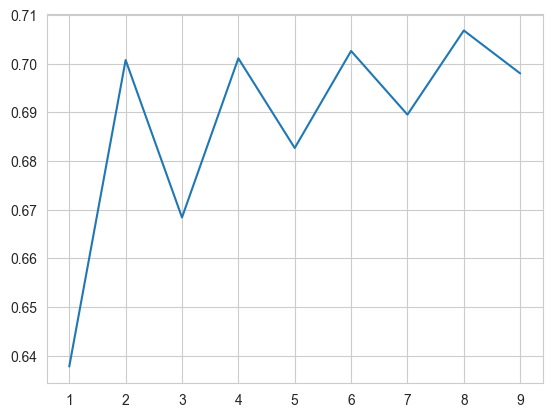

In [ ]:
plt.plot(range(1, 10), accuracy_scores2)

In [ ]:
# train again with best k on whole dev set
X_dev2 = scaler.fit_transform(X_dev2)
knn2 = KNeighborsClassifier(n_neighbors=8)
knn2.fit(X_dev2, y_dev2)
y_pred2 = knn2.predict(X_test2)
print('Accuracy on test set: ', accuracy_score(y_test2, y_pred2))
print('Confusion matrix: \n', confusion_matrix(y_test2, y_pred2))
print('Classification report: \n', classification_report(y_test2, y_pred2))

Accuracy on test set:  0.7078810579422107
Confusion matrix: 
 [[17109  1494]
 [ 6149  1412]]
Classification report: 
               precision    recall  f1-score   support

       False       0.74      0.92      0.82     18603
        True       0.49      0.19      0.27      7561

    accuracy                           0.71     26164
   macro avg       0.61      0.55      0.54     26164
weighted avg       0.66      0.71      0.66     26164



# df with prepared features

In [3]:
df_incidents_prepared = pd.read_csv('../dataset_preparation/incidents_prepared.csv', index_col=0)

In [4]:
df_incidents_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161550 entries, 2015-05-02 to 2015-05-05
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      161550 non-null  object 
 1   city_or_county             161550 non-null  object 
 2   address                    149848 non-null  object 
 3   latitude                   161550 non-null  float64
 4   longitude                  161550 non-null  float64
 5   congressional_district     161550 non-null  float64
 6   avg_age_participants       161550 non-null  float64
 7   n_killed                   161550 non-null  int64  
 8   incident_characteristics1  161550 non-null  object 
 9   year                       161550 non-null  float64
 10  age_group                  161550 non-null  object 
 11  povertyPercentage          161550 non-null  float64
 12  population                 161550 non-null  int64  
 13  party                

In [5]:
df_incidents_prepared['isKilled'] = df_incidents_prepared['n_killed'] > 0

In [6]:
cols2drop =['year', 'state', 'city_or_county', 'n_killed', 'incident_characteristics1',
             'congressional_district', 'address', 'year_month', 'age_group', 'party',
             'candidatevotes', 'severity_cat', 'dfm_district_killed', 'killed_by_district', 'severity' ]
df_incidents_prepared = df_incidents_prepared.drop(cols2drop, axis=1)

In [7]:
df_incidents_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161550 entries, 2015-05-02 to 2015-05-05
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   latitude                   161550 non-null  float64
 1   longitude                  161550 non-null  float64
 2   avg_age_participants       161550 non-null  float64
 3   povertyPercentage          161550 non-null  float64
 4   population                 161550 non-null  int64  
 5   severity_minor             161550 non-null  float64
 6   injured_by_district        161550 non-null  float64
 7   arrested_ratio             161550 non-null  float64
 8   unharmed_ratio             161550 non-null  float64
 9   right_or_left              161550 non-null  float64
 10  dfm_district_injured       161550 non-null  float64
 11  dfm_district_participants  161550 non-null  float64
 12  dfm_district_child         161550 non-null  float64
 13  dfm_district_teen    

In [8]:
X3=df_incidents_prepared.drop('isKilled', axis=1)
y3=df_incidents_prepared['isKilled']
X_dev3, X_test3, y_dev3, y_test3 = train_test_split(X3, y3, test_size=0.15, random_state=42)

In [9]:
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_dev3, y_dev3, test_size=0.25, random_state=42)
print(' # X_train3: ', X_train3.shape[0])
print(' # X_val3 : ', X_val3.shape[0])
print(' # X_test3 : ', X_test3.shape[0])
print("% killed in train set: ", y_train3.sum()/y_train3.shape[0])
print("% killed in val set: ", y_val3.sum()/y_val3.shape[0])
print("% killed in test set: ", y_test3.sum()/y_test3.shape[0])


 # X_train3:  102987
 # X_val3 :  34330
 # X_test3 :  24233
% killed in train set:  0.2818705273481119
% killed in val set:  0.28191086513253716
% killed in test set:  0.2769776750711839


In [12]:
# standardize data
X_train3 = scaler.fit_transform(X_train3)
X_val3 = scaler.transform(X_val3)
X_test3 = scaler.transform(X_test3)
X_dev3 = scaler.transform(X_dev3)

In [17]:
#logistic regression
logreg = LogisticRegression('l2')
logreg_model3 = logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_val3)
y_pred_train3 = logreg.predict(X_train3)
print('Accuracy on training set: ', accuracy_score(y_train3, y_pred_train3))
print('confusion_matrix on training set: \n', confusion_matrix(y_train3, y_pred_train3))
print('Accuracy on validation set: ', accuracy_score(y_val3, y_pred3))
print('Confusion matrix: \n', confusion_matrix(y_val3, y_pred3))
print('Classification report: \n', classification_report(y_val3, y_pred3))

Accuracy on training set:  0.9257964597473467
confusion_matrix on training set: 
 [[71204  2754]
 [ 4888 24141]]
Accuracy on validation set:  0.9282551704048937
Confusion matrix: 
 [[23774   878]
 [ 1585  8093]]
Classification report: 
               precision    recall  f1-score   support

       False       0.94      0.96      0.95     24652
        True       0.90      0.84      0.87      9678

    accuracy                           0.93     34330
   macro avg       0.92      0.90      0.91     34330
weighted avg       0.93      0.93      0.93     34330



In [18]:
# plot confusion matrix
plot_confusion_matrix(logreg_model3, X_val3, y_val3, cmap=plt.cm.Blues)


NameError: name 'plot_confusion_matrix' is not defined

In [19]:
# weights of model
for i in zip(df_incidents_prepared.columns, logreg_model3.coef_[0]):
    print(i)

('latitude', -0.4620200772489034)
('longitude', -0.3843752693380765)
('avg_age_participants', 0.25643770409334654)
('povertyPercentage', -0.009851598082919863)
('population', -0.10358036428262425)
('severity_minor', 0.13346380972749947)
('injured_by_district', 0.0496240685298872)
('arrested_ratio', -3.1853076926974992)
('unharmed_ratio', -3.1825462677894945)
('right_or_left', 0.38320046946359615)
('dfm_district_injured', -3.2845650861731386)
('dfm_district_participants', 2.6103575784797672)
('dfm_district_child', -0.20675243751900108)
('dfm_district_teen', -0.20537345355500747)
('dfm_district_females', -0.010692479634205719)
('voters_over_population', -0.07989185846781685)


# Without 'n_injured', 'n_unharmed', 'n_arrested'

In [77]:
# imports
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [78]:
df_incidents_prepared = pd.read_csv('../dataset_preparation/incidents_prepared.csv', index_col=0)
df_orig = pd.read_csv('../dataset_preparation/original_features.csv', index_col=0)

In [79]:
df_incidents_prepared['isKilled'] = df_incidents_prepared['n_killed'] > 0

In [80]:
df_incidents_prepared['n_participants'] = df_orig['n_participants']

In [81]:
df_incidents_prepared['n_females'] = df_orig['n_females']

In [82]:
df_incidents_prepared['n_teens'] = df_orig['n_participants_teen']

In [83]:
df_incidents_prepared['n_children'] = df_orig['n_participants_child']

In [84]:
df_incidents_prepared['n_injured'] = df_orig['n_injured']


In [85]:
cols2drop=['address', 'city_or_county','congressional_district',
           'avg_age_participants', 'n_killed', 'incident_characteristics1','severity',
           'severity_cat','severity_minor','year_month','killed_by_district','injured_by_district',
           'dfm_district_killed','dfm_district_injured', 'dfm_district_participants', 'dfm_district_child', 'dfm_district_teen', 'dfm_district_females', 'date','state', 'arrested_ratio', 'unharmed_ratio']
df_incidents_prepared=df_incidents_prepared.drop(cols2drop, axis=1)

In [86]:
df_incidents_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161550 entries, 0 to 164506
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   latitude                161550 non-null  float64
 1   longitude               161550 non-null  float64
 2   year                    161550 non-null  float64
 3   age_group               161550 non-null  object 
 4   povertyPercentage       161550 non-null  float64
 5   population              161550 non-null  int64  
 6   party                   161550 non-null  object 
 7   candidatevotes          161550 non-null  float64
 8   right_or_left           161550 non-null  float64
 9   voters_over_population  161550 non-null  float64
 10  isKilled                161550 non-null  bool   
 11  n_participants          161550 non-null  float64
 12  n_females               161550 non-null  float64
 13  n_teens                 161550 non-null  float64
 14  n_children          

In [87]:
X=df_incidents_prepared.drop('isKilled', axis=1)
y=df_incidents_prepared['isKilled']

In [88]:
X.shape

(161550, 15)

In [89]:
import pandas as pd
X=pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161550 entries, 0 to 164506
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   latitude                161550 non-null  float64
 1   longitude               161550 non-null  float64
 2   year                    161550 non-null  float64
 3   povertyPercentage       161550 non-null  float64
 4   population              161550 non-null  int64  
 5   candidatevotes          161550 non-null  float64
 6   right_or_left           161550 non-null  float64
 7   voters_over_population  161550 non-null  float64
 8   n_participants          161550 non-null  float64
 9   n_females               161550 non-null  float64
 10  n_teens                 161550 non-null  float64
 11  n_children              161550 non-null  float64
 12  n_injured               161550 non-null  int64  
 13  age_group_[0-11]        161550 non-null  uint8  
 14  age_group_[12-17]   

## Decision Tree

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,latitude,longitude,year,povertyPercentage,population,candidatevotes,right_or_left,voters_over_population,n_participants,n_females,...,age_group_[12-17],age_group_[18-24],age_group_[25-34],age_group_[35-44],age_group_[45-54],age_group_[55-64],age_group_[65-74],age_group_[75-100],party_DEMOCRAT,party_REPUBLICAN
72096,41.5094,-87.3501,2016.0,11.8,6634304,207515.0,0.184883,0.400700,2.0,0.0,...,0,1,0,0,0,0,0,0,1,0
159077,30.0788,-95.4261,2015.0,14.0,27470056,101936.0,0.679456,0.162122,4.0,0.0,...,0,1,0,0,0,0,0,0,0,1
124316,34.1473,-77.8766,2017.0,13.6,10268233,211801.0,0.609138,0.447833,2.0,1.0,...,0,0,0,1,0,0,0,0,0,1
144416,42.4051,-82.9640,2017.0,10.7,9973114,244135.0,0.214934,0.468350,1.0,0.0,...,0,0,0,0,0,1,0,0,1,0
41932,33.5675,-112.1560,2014.0,18.1,6730413,128710.0,0.758117,0.218055,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [122]:
# for loop to determine best depth
accuracy_scores = []
precisions=[]
recalls=[]
f1 = []
for i in tqdm(range(1, 20)):
    tree = DecisionTreeClassifier(random_state=42, max_depth=i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

  0%|          | 0/19 [00:00<?, ?it/s]C:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  5%|▌         | 1/19 [00:00<00:06,  2.86it/s]C:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 19/19 [00:25<00:00,  1.32s/it]


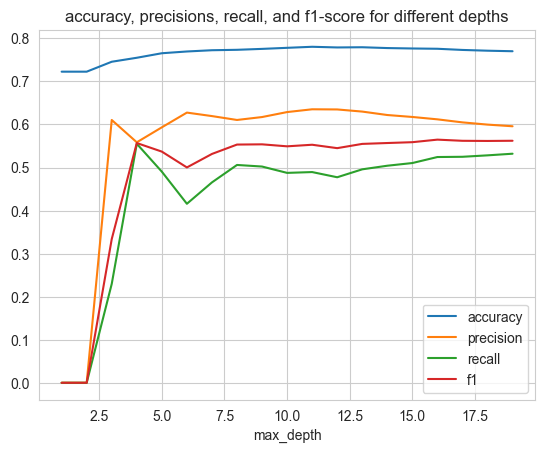

In [123]:
plt.plot(range(1, 20), accuracy_scores)
plt.plot(range(1, 20), precisions)
plt.plot(range(1, 20), recalls)
plt.plot(range(1, 20), f1)
plt.xlabel('max_depth')
plt.legend(['accuracy' ,'precision', 'recall','f1'])
plt.title('accuracy, precisions, recall, and f1-score for different depths')
plt.show()

In [124]:
tree = DecisionTreeClassifier(random_state=42, max_depth=100)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy on training set:  0.9994970597338285
confusion_matrix on training set: 
 [[92779     3]
 [   62 36396]]
Accuracy on validation set:  0.7469823584029712
Confusion matrix: 
 [[19213  4136]
 [ 4039  4922]]
Classification report: 
               precision    recall  f1-score   support

       False       0.83      0.82      0.82     23349
        True       0.54      0.55      0.55      8961

    accuracy                           0.75     32310
   macro avg       0.68      0.69      0.69     32310
weighted avg       0.75      0.75      0.75     32310



### Grid search for Decision Tree Parameters

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score, pos_label =True)
param_grid = {'max_depth': [4, 8, 16],
              'min_samples_split': [2,4, 8, 16],
              'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring=f1, verbose =3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.537 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.571 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.560 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.537 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.571 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.560 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.537 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.571 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.560 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=16;, score=0.537 total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring=make_scorer(f1_score, pos_label=True), verbose=3)

In [126]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 16}

#### Finer grid search  around best parameters

In [133]:
# finer grid search around best parameters
param_grid = {'max_depth': [12, 14,16, 18,20],
              'min_samples_split': [12, 14,16, 18 ],
              'criterion': ['gini']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose =3)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=gini, max_depth=12, min_samples_split=12;, score=0.537 total time=   2.3s
[CV 2/3] END criterion=gini, max_depth=12, min_samples_split=12;, score=0.554 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=12, min_samples_split=12;, score=0.555 total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=12, min_samples_split=14;, score=0.537 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=12, min_samples_split=14;, score=0.554 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=12, min_samples_split=14;, score=0.554 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=12, min_samples_split=16;, score=0.537 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=12, min_samples_split=16;, score=0.554 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=12, min_samples_split=16;, score=0.554 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=12, min_samples_split=18;, 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_depth': [12, 14, 16, 18, 20],
                         'min_samples_split': [12, 14, 16, 18]},
             scoring='f1', verbose=3)

In [134]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 18}

In [135]:
#best parameters
tree = DecisionTreeClassifier(random_state=42, max_depth=14, min_samples_leaf=18, criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=18, random_state=42)

In [136]:
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print('Best decision Tree model trained on whole development set (unbalanced)')
print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))


Best decision Tree model trained on whole development set (unbalanced)
Accuracy on training set:  0.8091070875889818
confusion_matrix on training set: 
 [[84539  8243]
 [16428 20030]]
Accuracy on validation set:  0.7784586815227483
Confusion matrix: 
 [[20712  2637]
 [ 4521  4440]]
Classification report: 
               precision    recall  f1-score   support

       False       0.82      0.89      0.85     23349
        True       0.63      0.50      0.55      8961

    accuracy                           0.78     32310
   macro avg       0.72      0.69      0.70     32310
weighted avg       0.77      0.78      0.77     32310



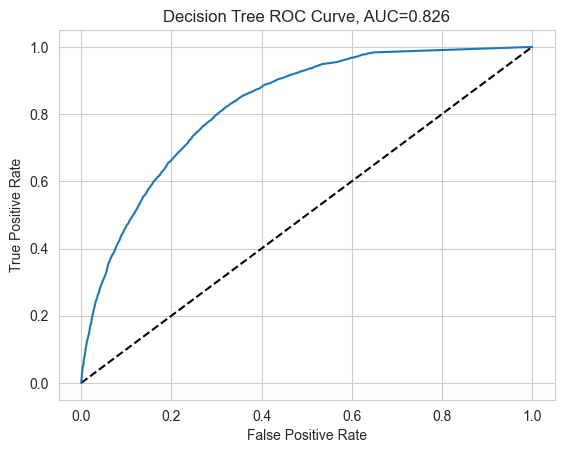

In [139]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Decision Tree ROC Curve, AUC={ roc_auc_score(y_test, y_pred_proba):.3f}')

plt.show()


### Try balancing data

#### Undersampling

In [106]:
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=41)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
X_undersampled.shape

(72916, 24)

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score, pos_label =True)
param_grid = {'max_depth': [4, 8, 16],
              'min_samples_split': [2,4, 8, 16],
              'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose =3)
grid.fit(X_undersampled, y_undersampled)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.766 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.753 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.763 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.766 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.753 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.763 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.766 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.753 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.763 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=16;, score=0.766 total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='f1', verbose=3)

In [108]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [314]:
# new grid
param_grid = {'max_depth': [4,5,6,7,8],
              'min_samples_split': [6,7,8,9,10],
              'criterion': ['gini']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose =3)
grid.fit(X_undersampled, y_undersampled)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=6;, score=0.780 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=6;, score=0.779 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=6;, score=0.779 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=7;, score=0.780 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=7;, score=0.779 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=7;, score=0.779 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.780 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.779 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.779 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=9;, score=0.780 total ti

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [6, 7, 8, 9, 10]},
             scoring='f1', verbose=3)

In [315]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6}

In [110]:
tree_balanced = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_split=6,  criterion='gini')
tree_balanced.fit(X_undersampled, y_undersampled)

DecisionTreeClassifier(max_depth=2, min_samples_split=6, random_state=42)

In [111]:
y_pred = tree_balanced.predict(X_test)
y_pred_train = tree_balanced.predict(X_undersampled)
print('Accuracy on training set: ', accuracy_score(y_undersampled, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_undersampled, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy on training set:  0.7144659608316419
confusion_matrix on training set: 
 [[18453 18005]
 [ 2815 33643]]
Accuracy on validation set:  0.6215413184772516
Confusion matrix: 
 [[11826 11523]
 [  705  8256]]
Classification report: 
               precision    recall  f1-score   support

       False       0.94      0.51      0.66     23349
        True       0.42      0.92      0.57      8961

    accuracy                           0.62     32310
   macro avg       0.68      0.71      0.62     32310
weighted avg       0.80      0.62      0.64     32310



#### Oversampling

In [112]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
X_oversampled.shape

(185564, 24)

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score, pos_label =True)
param_grid = {'max_depth': [4, 8, 16],
              'min_samples_split': [2,4, 8, 16],
              'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose =3)
grid.fit(X_oversampled, y_oversampled)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.765 total time=   1.1s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.769 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=2;, score=0.768 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.765 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.769 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=4;, score=0.768 total time=   1.3s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.765 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.769 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=4, min_samples_split=8;, score=0.768 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=4, min_samples_split=16;, score=0.765 total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='f1', verbose=3)

In [116]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 2}

In [117]:
tree_oversampled = DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_split=2,  criterion='gini')
tree_oversampled.fit(X_oversampled, y_oversampled)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [118]:
y_pred = tree_oversampled.predict(X_test)
y_pred_train = tree_oversampled.predict(X_oversampled)
print('Accuracy on training set: ', accuracy_score(y_oversampled, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_oversampled, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy on training set:  0.844630424004656
confusion_matrix on training set: 
 [[73386 19396]
 [ 9435 83347]]
Accuracy on validation set:  0.7369235530795419
Confusion matrix: 
 [[17191  6158]
 [ 2342  6619]]
Classification report: 
               precision    recall  f1-score   support

       False       0.88      0.74      0.80     23349
        True       0.52      0.74      0.61      8961

    accuracy                           0.74     32310
   macro avg       0.70      0.74      0.71     32310
weighted avg       0.78      0.74      0.75     32310



## KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [145]:
# train model
accuracy_scores = []
f1_scores =[]
for i in tqdm(range(1, 10)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

100%|██████████| 9/9 [02:02<00:00, 13.59s/it]


Text(0.5, 1.0, 'accuracy and f1-score for different k values')

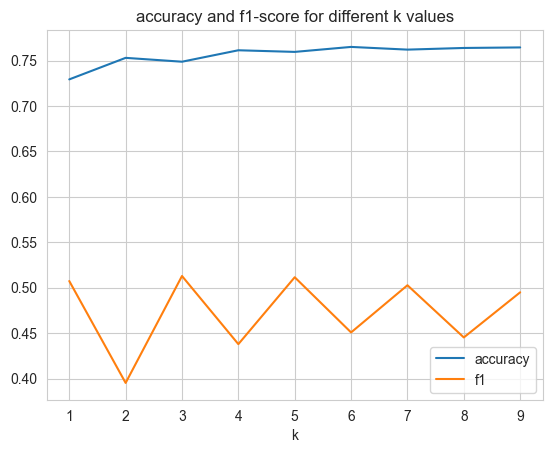

In [146]:
plt.plot(range(1, 10), accuracy_scores)
plt.plot(range(1, 10), f1_scores)
plt.xlabel('k')
plt.legend(['accuracy' ,'f1'])
plt.title('accuracy and f1-score for different k values')



In [147]:
# train again with best k on whole dev set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy on test set:  0.7596409780253791
Confusion matrix: 
 [[20478  2871]
 [ 4895  4066]]
Classification report: 
               precision    recall  f1-score   support

       False       0.81      0.88      0.84     23349
        True       0.59      0.45      0.51      8961

    accuracy                           0.76     32310
   macro avg       0.70      0.67      0.68     32310
weighted avg       0.75      0.76      0.75     32310



## Logistic regression

In [92]:
X_train

,latitude,longitude,year,povertyPercentage,population,candidatevotes,right_or_left,voters_over_population,n_participants,n_females,...,age_group_[12-17],age_group_[18-24],age_group_[25-34],age_group_[35-44],age_group_[45-54],age_group_[55-64],age_group_[65-74],age_group_[75-100],party_DEMOCRAT,party_REPUBLICAN
72096,41.5094,-87.3501,2016.0,11.8,6634304,207515.0,0.184883,0.400700,2.0,0.0,...,0,1,0,0,0,0,0,0,1,0
159077,30.0788,-95.4261,2015.0,14.0,27470056,101936.0,0.679456,0.162122,4.0,0.0,...,0,1,0,0,0,0,0,0,0,1
124316,34.1473,-77.8766,2017.0,13.6,10268233,211801.0,0.609138,0.447833,2.0,1.0,...,0,0,0,1,0,0,0,0,0,1
144416,42.4051,-82.9640,2017.0,10.7,9973114,244135.0,0.214934,0.468350,1.0,0.0,...,0,0,0,0,0,1,0,0,1,0
41932,33.5675,-112.1560,2014.0,18.1,6730413,128710.0,0.758117,0.218055,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122307,40.8303,-73.9478,2016.0,11.8,19633428,207194.0,0.188235,0.397300,3.0,0.0,...,0,0,1,0,0,0,0,0,1,0
105898,36.8071,-119.6720,2016.0,12.5,39167117,158755.0,0.675651,0.342482,3.0,0.0,...,0,0,1,0,0,0,0,0,0,1
134581,42.7352,-87.7959,2014.0,11.0,5751525,182316.0,0.632668,0.409557,2.0,0.0,...,1,0,0,0,0,0,0,0,0,1
149666,27.3226,-80.3804,2017.0,12.8,20963613,201488.0,0.535989,0.421560,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy on training set:  0.7318090374497059
confusion_matrix on training set: 
 [[85674  7108]
 [27553  8905]]
Accuracy on validation set:  0.7332714329928814
Confusion matrix: 
 [[21560  1789]
 [ 6829  2132]]
Classification report: 
               precision    recall  f1-score   support

       False       0.76      0.92      0.83     23349
        True       0.54      0.24      0.33      8961

    accuracy                           0.73     32310
   macro avg       0.65      0.58      0.58     32310
weighted avg       0.70      0.73      0.69     32310



In [94]:
# weights of model
for i in zip(X.columns, logreg_model.coef_[0]):
    print(i)

('latitude', -0.22691250734656887)
('longitude', -0.1345313800112381)
('year', 0.04517083613502728)
('povertyPercentage', 0.006232838324137299)
('population', -0.04485873722895585)
('candidatevotes', 0.07737770772894101)
('right_or_left', -0.25058822943825504)
('voters_over_population', -0.2134447414103283)
('n_participants', 0.4607719484178424)
('n_females', 0.06590461710916817)
('n_teens', -0.003972764296771843)
('n_children', 0.029711379332977256)
('n_injured', -1.0778567064453866)
('age_group_[0-11]', -0.053281099514143775)
('age_group_[12-17]', -0.1377974671670315)
('age_group_[18-24]', -0.08509522353840995)
('age_group_[25-34]', 0.02799710222386613)
('age_group_[35-44]', 0.06762885756513441)
('age_group_[45-54]', 0.08835807658420265)
('age_group_[55-64]', 0.07135393719270403)
('age_group_[65-74]', 0.03955356385425818)
('age_group_[75-100]', 0.033195025406183784)
('party_DEMOCRAT', 0.005182070158533279)
('party_REPUBLICAN', -0.005182070158533279)


In [259]:
# correlation n_killed and n_injured
df_orig['isKilled'] = df_incidents_prepared['isKilled']
df_orig['isInjured'] = df_orig['n_injured'] > 0
df_orig['isKilled'].corr(df_orig['isInjured'])

-0.3597385293540303

## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rand_for = RandomForestClassifier(max_depth=8, min_samples_split=4, criterion='gini', random_state=42)
rand_for.fit(X_undersampled, y_undersampled)
y_pred = rand_for.predict(X_test)
y_pred_train = rand_for.predict(X_train)
#print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
#print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))


Accuracy on validation set:  0.7156607861343237
Confusion matrix: 
 [[15973  7376]
 [ 1811  7150]]
Classification report: 
               precision    recall  f1-score   support

       False       0.90      0.68      0.78     23349
        True       0.49      0.80      0.61      8961

    accuracy                           0.72     32310
   macro avg       0.70      0.74      0.69     32310
weighted avg       0.79      0.72      0.73     32310



In [136]:
X_train_balanced = np.concatenate((X_train[y_train==1], X_train[y_train==0][:X_train[y_train==1].shape[0]]))
y_train_balanced = np.concatenate((y_train[y_train==1], y_train[y_train==0][:y_train[y_train==1].shape[0]]))
rand_for = RandomForestClassifier()
rand_for.fit(X_train_balanced, y_train_balanced)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19692\3544837073.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_balanced = np.concatenate((y_train[y_train==1], y_train[y_train==0][:y_train[y_train==1].shape[0]]))


RandomForestClassifier()

In [137]:

y_pred = rand_for.predict(X_test)
y_pred_train = rand_for.predict(X_train_balanced)

print('Accuracy on training set: ', accuracy_score(y_train_balanced, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train_balanced, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

C:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy on training set:  0.8958801909046026
confusion_matrix on training set: 
 [[32183  4275]
 [ 3317 33141]]
Accuracy on validation set:  0.7131538223460229
Confusion matrix: 
 [[16095  7254]
 [ 2014  6947]]
Classification report: 
               precision    recall  f1-score   support

       False       0.89      0.69      0.78     23349
        True       0.49      0.78      0.60      8961

    accuracy                           0.71     32310
   macro avg       0.69      0.73      0.69     32310
weighted avg       0.78      0.71      0.73     32310



In [140]:
# grid search for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [ 16, 32, 64],
              'min_samples_split': [ 8, 16, 32],
              'min_samples_leaf': [ 4, 8, 16],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [ 20, 30, 50]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose =3)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20;, score=0.483 total time=   2.2s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20;, score=0.492 total time=   2.1s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=20;, score=0.488 total time=   2.1s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.488 total time=   3.2s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.488 total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=30;, score=0.492 total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.493 total time=   5.4s
[CV 2/

KeyboardInterrupt: 

In [35]:
# from sklearn.neural_network import MLPClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# nn = MLPClassifier()
# nn.fit(X_train, y_train)
# y_pred = nn.predict(X_test)
# y_pred_train = nn.predict(X_train)
# print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
# print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
# print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
# print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
# print('Classification report: \n', classification_report(y_test, y_pred))

d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_train = svc.predict(X_train)
print('Accuracy on training set: ', accuracy_score(y_train, y_pred_train))
print('confusion_matrix on training set: \n', confusion_matrix(y_train, y_pred_train))
print('Accuracy on validation set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))